In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 1. Importing  Data

In [5]:
list1 = pd.read_csv('listings.csv')
list2 = pd.read_csv('listings2.csv')
nbhd = pd.read_csv('neighbourhoods.csv')
calendar = pd.read_csv('calendar.csv')
review1 = pd.read_csv('reviews.csv')
review2 = pd.read_csv('reviews2.csv')


#  2. Data Exploratory Analysis

In [6]:
print(list1.columns.values)
print(list1.shape)

['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']
(3818, 16)


In [7]:
print(list2.columns.values)
print(list2.shape)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'
 'host_id' 'host_url' 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates' 'bathrooms'
 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet' 'price'
 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'
 'guests_included' 'extra_people' 'minimum_nights' 'ma

In [8]:
# Join list1 and list2 to create the x vector
X = pd.concat([list1, list2], axis=1)
print(X.shape)
X.info(verbose = True, null_counts = True)

(3818, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 108 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_id                             3818 non-null int64
host_name                           3498 non-null object
neighbourhood_group                 3818 non-null object
neighbourhood                       3818 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
room_type                           3818 non-null object
price                               3818 non-null int64
minimum_nights                      3818 non-null int64
number_of_reviews                   3818 non-null int64
last_review                         3191 non-null object
reviews_per_month                   3191 non-null float64
calculated_host_listings_count      3818 non-null int64
availability_365            

In [9]:
Z1=X.loc[:, X.dtypes == np.float64] #Extracting columns with values of type float 
Z2=X.loc[:, X.dtypes == np.int64]   #Extracting columns with values of type int
X_numeric=pd.concat([Z1,Z2], axis=1)
"""X_numeric has duplicate columns. The code below removes the duplicate columns"""
_, i = np.unique(X_numeric.columns, return_index=True)
X_Num_Cov=X_numeric.iloc[:, i]
print(X_Num_Cov.describe())
print(X_Num_Cov.columns.values)
X_Num_Cov.to_csv('Numerical_FS.csv')

       accommodates  availability_30  availability_365  availability_60  \
count   3818.000000      3818.000000       3818.000000      3818.000000   
mean       3.349398        16.786276        244.772656        36.814825   
std        1.977599        12.173637        126.772526        23.337541   
min        1.000000         0.000000          0.000000         0.000000   
25%        2.000000         2.000000        124.000000        13.000000   
50%        3.000000        20.000000        308.000000        46.000000   
75%        4.000000        30.000000        360.000000        59.000000   
max       16.000000        30.000000        365.000000        60.000000   

       availability_90    bathrooms     bedrooms         beds  \
count      3818.000000  3802.000000  3812.000000  3817.000000   
mean         58.082504     1.259469     1.307712     1.735394   
std          34.063845     0.590369     0.883395     1.139480   
min           0.000000     0.000000     0.000000     1.000000   

In [10]:
X_select = X_Num_Cov[['accommodates','bathrooms','bedrooms','beds','guests_included','latitude','longitude','price']]
X_select = X_select.dropna()
Y = X_select['price']
X_select = X_select.drop(['price'], axis = 1)
print(X_select.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 3817
Data columns (total 7 columns):
accommodates       3796 non-null int64
bathrooms          3796 non-null float64
bedrooms           3796 non-null float64
beds               3796 non-null float64
guests_included    3796 non-null int64
latitude           3796 non-null float64
longitude          3796 non-null float64
dtypes: float64(5), int64(2)
memory usage: 237.2 KB
None


# Splitting data into training and testing sets

In [11]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=num_test, random_state=23)

In [30]:
X_test

,accommodates,bathrooms,bedrooms,beds,guests_included,latitude,longitude
3373,4,1.0,1.0,2.0,1,47.680179,-122.356169
2634,8,2.0,2.0,3.0,2,47.625456,-122.321742
3786,1,1.5,1.0,1.0,1,47.661396,-122.352256
1318,9,2.5,3.0,7.0,1,47.616498,-122.352965
2458,8,2.0,4.0,6.0,6,47.669624,-122.299964
3725,2,1.0,0.0,1.0,1,47.658982,-122.352276
47,2,1.0,0.0,1.0,1,47.638035,-122.360910
3770,1,1.0,1.0,1.0,1,47.660113,-122.351646
876,2,1.0,1.0,1.0,1,47.602137,-122.314142
685,6,1.0,2.0,3.0,2,47.615566,-122.285279


In [27]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
y_predict=clf.predict(X_test)
y_predict

array([ 125.11556359,  243.34364541,   86.77854565,  295.61881931,
        296.28296874,   68.89650169,   71.0656412 ,   73.8444864 ,
         88.441226  ,  178.18604329,  133.64378355,   96.39131378,
        156.34455383,  153.9498918 ,  130.12239362,   86.66853125,
        114.27625343,   68.59687589,   70.58578008,  196.53883336,
         71.02932979,   79.64446435,  102.25627158,  279.51320155,
         89.17719228,  130.823633  ,  179.14037081,  273.47683551,
        159.62612625,   93.64670512,   54.87327391,  320.50233114,
         68.14878261,  126.87759639,   87.63820266,  107.87779859,
        162.39467643,  102.74621809,   96.2628277 ,  111.06418975,
        109.76404711,  146.28940475,  150.71886495,  170.83509408,
         92.37448175,   86.69818718,   89.55713694,   99.13942652,
        135.90492349,  109.76177706,   87.6849534 ,  115.74736282,
         88.36482161,   67.48024063,  156.8977212 ,  126.17079455,
        125.70878807,   92.24544034,  207.97593032,   87.69116

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_predict))
rms

55.689396477813936

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.51942547613044643

In [40]:
clf.score(X_test, y_test)

0.51942547613044643

In [12]:
X.describe(include=['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,last_review,listing_url,last_scraped,name,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3498,3818,3818,3818,3818.000000,3191,3818,3818,3818,...,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3792,1397,17,87,3,NaN,321,3818,1,3792,...,1,1,984,321,1,1,2,3,2,2
top,Capitol Hill Apartment,Andrew,Other neighborhoods,Broadway,Entire home/apt,NaN,2016-01-02,https://www.airbnb.com/rooms/7598743,2016-01-04,Capitol Hill Apartment,...,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,3,55,794,397,2541,NaN,94,1,3818,3,...,3818,3818,25,94,3818,3818,3227,1417,3497,3443
mean,NaN,NaN,NaN,NaN,NaN,127.976166,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,90.250022,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
X.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,956883,NaN,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,16708587,NaN,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,9851441,NaN,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,1452570,NaN,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
# Extract the Y vector


In [15]:
print(nbhd.columns.values)
print(nbhd.shape)

['neighbourhood_group' 'neighbourhood']
(90, 2)


In [16]:
print(review1.columns.values)
print(review1.shape)

['listing_id' 'date']
(84849, 2)


In [17]:
print(review2.columns.values)
print(review2.shape)

['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
(84849, 6)


In [18]:
print(calendar.columns.values)
print(calendar.shape)
calendar.head()

['listing_id' 'date' 'available' 'price']
(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [19]:
newlist1= list1.drop(['host_name', 'last_review','host_id','calculated_host_listings_count'], axis=1)
newlist1.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,241032,Stylish Queen Anne Apartment,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,1,207,4.07,346
1,953595,Bright & Airy Queen Anne Apartment,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,2,43,1.48,291
2,3308979,New Modern House-Amazing water view,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,4,20,1.15,220
3,7421966,Queen Anne Chateau,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,1,0,NaN,143
4,278830,Charming craftsman 3 bdm house,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,1,38,0.89,365


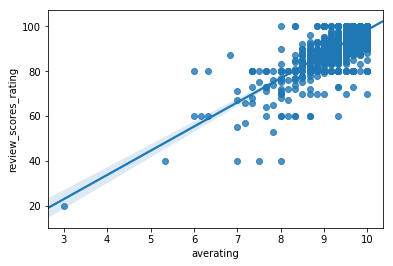

In [20]:
list2['averating'] = list2[["review_scores_checkin", "review_scores_accuracy","review_scores_communication", "review_scores_location","review_scores_value", "review_scores_cleanliness"]].mean(axis=1)
ax = sns.regplot(x="averating", y="review_scores_rating", data=list2)

In [21]:
yy = pd.DataFrame()
yy['review_scores_rating'] = list2['review_scores_rating']
xx = pd.DataFrame()
xx['host_response_rate'] = list2['host_response_rate']
# print(math.isnan(xx['host_response_rate'][3]))
for i in xrange(xx.shape[0]):
    if isinstance(xx['host_response_rate'][i], basestring):
        xx['host_response_rate'][i] = 1.0*int(xx['host_response_rate'][i][:-1])
combine = pd.concat([xx,yy], axis=1)
combine = combine.dropna()

print(combine.tail)
ax = sns.regplot(x='host_response_rate', y="review_scores_rating", data=combine)# 

NameError: name 'xrange' is not defined